## Team: Rahul Marru & Pindi Manivardhan Reddy

## This is our Project code. For code running, we implemented in Python - based Jupyter notework. 
## This our .ipynb file. Open in your jupyter notework or Open the file .html colab and run the cells to excute.
## Note: One more file named "datacorpus.txt" for access text data

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pickle
import sys
import heapq
import tensorflow as tf

In [4]:
from numpy.core.multiarray import dtype
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
from pylab import rcParams

In [5]:
source = 'datacorpus.txt'
data = open(source, "r", encoding='utf-8').read().lower()
print ('Corpus length: ',len(data))

Corpus length:  581888


In [6]:
words = data.split()

In [7]:
words[4:10]

['adventures', 'of', 'sherlock', 'holmes,', 'by', 'arthur']

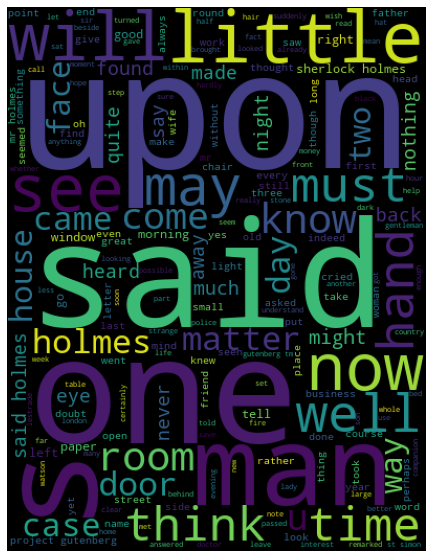

In [8]:
#Visualizing the Most repeating words
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
Cloud_img=WordCloud(background_color='black',height=520,width=400).generate(' '.join(words))
plt.imshow(Cloud_img)
plt.axis('off')
plt.show()

In [9]:
char_list = list(set(data))
characters = sorted(char_list)
characters_placement = dict((c, i) for i, c in enumerate(characters))
placement_characters = dict((i, c) for i, c in enumerate(characters))


In [10]:
print ("Count of identical characters",len(characters))

Count of identical characters 73


In [11]:
text_size = 39
step = 3
text = []
character_next = []
for i in range(0, len(data) - text_size, step):
    text.append(data[i:i+text_size])
    character_next.append(data[i+text_size])
print ('count of Training samples ',len(text))

count of Training samples  193950


In [12]:
inputs = np.zeros((len(text), text_size, len(characters)), dtype=np.bool)
output = np.zeros((len(text), len(characters)), dtype=np.bool)
for i, sentence in enumerate(text):
    for t, char in enumerate(sentence):
        inputs[i, t, characters_placement[char]] = 1
    output[i, characters_placement[character_next[i]]] = 1

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=43)

In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

135765
58185
135765
58185


## RNN Model

In [56]:
from keras.models import Sequential
from keras.layers import Activation, SimpleRNN

In [58]:
model1 = Sequential();
model1.add(SimpleRNN(128, input_shape=(text_size, len(characters))))
model1.add(Dense(len(characters)))
model1.add(Activation('softmax'))

In [59]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               25856     
                                                                 
 dense_1 (Dense)             (None, 73)                9417      
                                                                 
 activation_1 (Activation)   (None, 73)                0         
                                                                 
Total params: 35,273
Trainable params: 35,273
Non-trainable params: 0
_________________________________________________________________


In [60]:
#optimizer = RMSprop(lr= 0.01)
model1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr= 0.01), metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, validation_split=0.08, batch_size=128, epochs=20, shuffle=True).history

Epoch 1/20
976/976 [==============================] - 34s 33ms/step - loss: 3.0397 - accuracy: 0.1889 - val_loss: 2.6319 - val_accuracy: 0.2391
Epoch 2/20
976/976 [==============================] - 36s 37ms/step - loss: 2.5558 - accuracy: 0.2783 - val_loss: 2.4677 - val_accuracy: 0.2871
Epoch 3/20
976/976 [==============================] - 36s 37ms/step - loss: 2.5019 - accuracy: 0.2897 - val_loss: 2.5799 - val_accuracy: 0.2694
Epoch 4/20
976/976 [==============================] - 37s 38ms/step - loss: 2.5589 - accuracy: 0.2746 - val_loss: 2.7312 - val_accuracy: 0.2319
Epoch 5/20
976/976 [==============================] - 36s 37ms/step - loss: 2.5817 - accuracy: 0.2714 - val_loss: 2.4952 - val_accuracy: 0.2771
Epoch 6/20
976/976 [==============================] - 36s 37ms/step - loss: 2.5379 - accuracy: 0.2817 - val_loss: 2.8710 - val_accuracy: 0.1978
Epoch 7/20
976/976 [==============================] - 36s 37ms/step - loss: 2.8409 - accuracy: 0.2131 - val_loss: 2.8433 - val_accuracy:

In [61]:
print(history1['loss'])
print(history1['accuracy']) 

[3.0396811962127686, 2.5558114051818848, 2.5019419193267822, 2.558896780014038, 2.581653118133545, 2.537924289703369, 2.8409175872802734, 2.7942686080932617, 2.710585117340088, 2.8470687866210938, 2.881225347518921, 2.970066547393799, 2.980051040649414, 2.992225408554077, 3.0127618312835693, 3.0097715854644775, 3.0521631240844727, 3.0463738441467285, 3.0772058963775635, 3.0878610610961914]
[0.18893861770629883, 0.2782559394836426, 0.2896807789802551, 0.27457305788993835, 0.27142661809921265, 0.28174662590026855, 0.21312537789344788, 0.2245662659406662, 0.23975405097007751, 0.21119588613510132, 0.20970673859119415, 0.18499155342578888, 0.18272580206394196, 0.1740390509366989, 0.1717492789030075, 0.1733265072107315, 0.16567255556583405, 0.16765010356903076, 0.1584269404411316, 0.1594036966562271]


In [62]:
y_pred_rnn = model1.predict(X_test)

1819/1819 [==============================] - 10s 6ms/step


In [63]:
y_true_rnn = np.argmax(y_pred_rnn, axis=1)
y_true_rnn

array([51, 51, 52, ..., 52,  1,  1], dtype=int64)

In [64]:
y_test_rnn = np.argmax(y_test, axis=1)
y_test_rnn

array([52,  1, 46, ..., 41, 36, 53], dtype=int64)

## Accuracy of RNN model

In [65]:
accuracy_rnn = accuracy_score(y_test_rnn, y_true_rnn)
print('RNN model Accuracy = %.2f' % accuracy_rnn)

RNN model Accuracy = 0.13


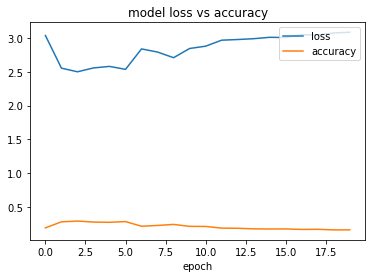

In [66]:
from matplotlib import pyplot
pyplot.plot(history1['loss'])
pyplot.plot(history1['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

## LSTM Model - 
#### we have try with Relu activition function and Adam optimizer but Softmax activiation function and RMSprop are better when compare by excution

In [16]:
model = Sequential();
model.add(LSTM(128, input_shape=(text_size, len(characters))))
model.add(Dense(len(characters)))
model.add(Activation('softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


In [18]:

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr= 0.01), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.08, batch_size=128, epochs=20, shuffle=True).history

Epoch 1/20
976/976 [==============================] - 101s 100ms/step - loss: 2.0726 - accuracy: 0.3963 - val_loss: 1.8015 - val_accuracy: 0.4608
Epoch 2/20
976/976 [==============================] - 94s 97ms/step - loss: 1.6915 - accuracy: 0.4956 - val_loss: 1.6771 - val_accuracy: 0.5015
Epoch 3/20
976/976 [==============================] - 92s 95ms/step - loss: 1.5680 - accuracy: 0.5296 - val_loss: 1.6213 - val_accuracy: 0.5170
Epoch 4/20
976/976 [==============================] - 89s 91ms/step - loss: 1.4963 - accuracy: 0.5488 - val_loss: 1.6000 - val_accuracy: 0.5260
Epoch 5/20
976/976 [==============================] - 63s 65ms/step - loss: 1.4495 - accuracy: 0.5616 - val_loss: 1.5927 - val_accuracy: 0.5244
Epoch 6/20
976/976 [==============================] - 70s 72ms/step - loss: 1.4183 - accuracy: 0.5700 - val_loss: 1.5896 - val_accuracy: 0.5304
Epoch 7/20
976/976 [==============================] - 66s 68ms/step - loss: 1.3897 - accuracy: 0.5779 - val_loss: 1.5822 - val_accurac

In [77]:
print(history['loss'])
print(history['accuracy']) 

[2.072577476501465, 1.691488265991211, 1.5680179595947266, 1.4963245391845703, 1.4495444297790527, 1.4183367490768433, 1.3897082805633545, 1.3696739673614502, 1.3557392358779907, 1.3424829244613647, 1.3289661407470703, 1.317392349243164, 1.3048450946807861, 1.297601342201233, 1.2879221439361572, 1.2808091640472412, 1.2769335508346558, 1.2696120738983154, 1.2634609937667847, 1.259251594543457]
[0.3963475525379181, 0.49556857347488403, 0.5295949578285217, 0.5487858653068542, 0.5615957975387573, 0.569994330406189, 0.5779204368591309, 0.5834047198295593, 0.5869354605674744, 0.5898417234420776, 0.5930041670799255, 0.5961906313896179, 0.6008582711219788, 0.6020432114601135, 0.6059902310371399, 0.6070070266723633, 0.6066627502441406, 0.6089845895767212, 0.610497772693634, 0.6128035187721252]


In [19]:
y_pred = model.predict(X_test)

1819/1819 [==============================] - 22s 12ms/step


In [20]:
y_true = np.argmax(y_pred, axis=1)
y_true

array([52,  1, 36, ..., 47, 36, 50], dtype=int64)

In [21]:
y_test1 = np.argmax(y_test, axis=1)
y_test1

array([52,  1, 46, ..., 41, 36, 53], dtype=int64)

## Accuracy of LSTM model

In [22]:
accuracy1 = accuracy_score(y_test1, y_true)
print('LSTM model Accuracy = %.2f' % accuracy1)

LSTM model Accuracy = 0.54


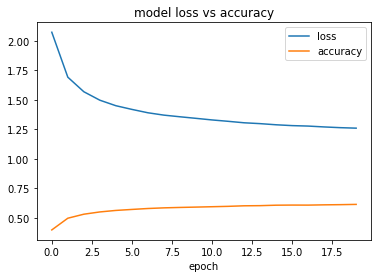

In [55]:
from matplotlib import pyplot
pyplot.plot(history['loss'])
pyplot.plot(history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

## Bi-LSTM

In [67]:
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.layers import *
from sklearn.model_selection import cross_val_score

In [68]:
X_train_bl = tf.random.normal((text_size, 39,73))
y_train_bl = tf.random.uniform((text_size, ), maxval=2, dtype=tf.int32)

X_test_bl = tf.random.normal((text_size, 39,73))
y_test_bl = tf.random.uniform((text_size, ), maxval=2, dtype=tf.int32)

In [69]:
from keras.utils.np_utils import to_categorical

In [70]:
y_train_bl = to_categorical(y_train_bl, 73)
y_test_bl = to_categorical(y_test_bl, 73)

In [71]:
model5 = Sequential()
model5.add(Bidirectional(LSTM(128, input_shape=(text_size, len(characters)))))
model5.add(Dense(len(characters)))


model5.add(Activation('softmax'))                
optimizer = RMSprop(lr= 0.01)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history5 = model5.fit(X_train_bl, y_train_bl, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history
print(model5.summary())
print(model5)

Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 4.3027 - accuracy: 0.0270 - val_loss: 3.6294 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 90ms/step - loss: 1.1167 - accuracy: 1.0000 - val_loss: 0.5535 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 76ms/step - loss: 0.4411 - accuracy: 0.8108 - val_loss: 8.6195 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 70ms/step - loss: 8.2660 - accuracy: 0.5135 - val_loss: 1.9138 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 75ms/step - loss: 1.5484 - accuracy: 0.5135 - val_loss: 2.7057 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 71ms/step - loss: 2.1781 - accuracy: 0.4865 - val_loss: 1.1037 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 71ms/step - loss: 0.5955 - accuracy: 0.6216 - val_loss: 0.7713 - val_accuracy: 0.5000
Epoch 8/10
1/1 [===========

In [72]:
y_pred5 = model5.predict(X_test_bl)

2/2 [==============================] - 2s 23ms/step


In [73]:
y_test5 = np.argmax(y_test_bl, axis=1)
y_test5

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [74]:
y_true5 = np.argmax(y_pred5, axis=1)
y_true5

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

## Accuracy of Bi-LSTM model

In [75]:
accuracy3 = accuracy_score(y_test5, y_true5)
print('BiLSTM model Accuracy = %.2f' % accuracy3)

BiLSTM model Accuracy = 0.51


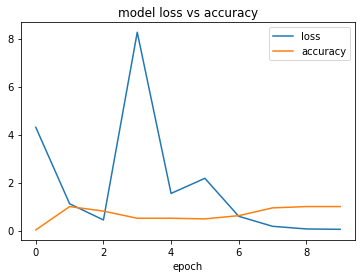

In [76]:
from matplotlib import pyplot
pyplot.plot(history5['loss'])
pyplot.plot(history5['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

In [23]:
def sample_input(text):
    x = np.zeros((1, text_size, len(characters)))
    for t, char in enumerate(text):
        x[0, t, characters_placement[char]] = 1
    return x

In [24]:
def raw_data(predict, top_n = 3):
    predict = np.asarray(predict).astype('float64')
    predict = np.log(predict)
    exp_preds = np.exp(predict)
    predict = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(predict)), predict.take)

In [50]:
def sample_pred(text):
    given_input = text
    generalised = text
    prediction = ''
    while True:
        x = sample_input(text)
        predict = model.predict(x, verbose=0)[0]
        next_loc = raw_data(predict, top_n=1)[0]
        token_next = placement_characters[next_loc]

        text = text[1:] + token_next
        prediction += token_next

        
               
        if len(given_input + prediction) + 2 > len(given_input) and token_next == ' ':
            return prediction

In [53]:
def sample_outcome(text, n = 3):
    x = sample_input(text)
    predict = model.predict(x, verbose=0)[0]
    next_indices = raw_data(predict, n)
    return [placement_characters[idx] + sample_pred(text[1:] + placement_characters[idx]) for idx in next_indices]

quotes = [
    
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    
]

## Test Cases:

In [54]:
for predict_word in quotes:
    sentence = predict_word[:text_size].lower()
    print (sentence)
    print (sample_outcome(sentence, 5))
    print ()

that which does not kill us makes us st
['ate ', 'reet. ', 'ill ', 'oring ', 'eps ']

i'm not upset that you lied to me, i'm 
['to ', 'could ', 'will ', 'should ', 'found ']

and those who were seen dancing were th
['e ', 'is ', 'ose ', 'at ', 'rough ']

